In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import emcee
import corner
import batman
import copy
import time
from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec
import scipy.optimize as sciop

import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [2]:
header = ascii.read("./CDJ36_5Gyr_header.txt")
print header
print header.colnames
print len(header.colnames)

Planet ID System ID ... Radial optical depth from star to planet
--------- --------- ... ----------------------------------------
['Planet ID', 'System ID', 'Timestep', 'Core Mass [Mearth]', 'Envelope Mass [Mearth]', 'Total Mass [Mearth]', 'Surface Luminosity', 'Accretion rate of planetesimals', 'Accretion rate into envelope', 'Core Radius [Rjup]', 'Pressure at core-envelope interface [bar]', 'Temperature at core-envelope interface [K]', 'Gas density at core-envelope interface [g/cm^3]', 'Total Radius [Rjup]', 'Total Luminosity', 'Surface Pressure [bar]', 'Surface Temperature [K]', 'Semi Major Axis', 'Sound Speed', 'Mass of gas disc [Mearth]', 'Mass of the planetesimal disc [Mearth]', 'Hill sphere radius [RJ]', 'Bondi Radius', 'Timestep [yr]', 'Mean planetesimal surface density in Feeding zone', 'Nominal width of feeding zone [AU]', "Planetesimals' capture radius [RJ]", 'Disk midplane temperature in PLANETE. Equilibrium temperature in COMPLETO', 'Disk midplane pressure [bar]', 'Migrati

In [3]:
data = np.loadtxt("./CDJ36_5Gyr.txt",delimiter="\t")
print np.shape(data)
print len(data)/99.

print (len(data) - 1)/98.

data = data[1:]
print len(data)/98.

(2932749,)
29623.7272727
29926.0
29926.0


In [4]:
systemCounter = 1
planetCounter = 1
entryCounter = 0
loopcounter = 0

newData = np.atleast_2d(np.zeros((99)))
otherTimesteps = []

#thisTimestep = 50000.

while entryCounter < len(data):
    row = np.atleast_2d(np.zeros((99)))
    
    #if (np.abs(data[entryCounter+1] - thisTimestep) < 10.):
    if True:
        newPlanetCounter = data[entryCounter]
        if newPlanetCounter < planetCounter:
            systemCounter += 1
            planetCounter = newPlanetCounter
        else:
            planetCounter = newPlanetCounter
        row[0,0] = systemCounter
        row[0,1:] = data[entryCounter:entryCounter+98]
        entryCounter = entryCounter + 98
        newData = np.vstack((newData,row))
    
    else:
        otherTimesteps.append(data[entryCounter+1])
        #print "wrong timestep?"
        #print "systemID: {0}".format(systemCounter)
        #print "planetID: {0}".format(data[entryCounter])
        entryCounter = entryCounter + 98
    
    loopcounter = loopcounter+1
    
print "systemID: {0}".format(systemCounter)
print "planetID: {0}".format(planetCounter) 
print loopcounter

newData = newData[1:]

systemID: 3
planetID: 30000.0
29926


[]


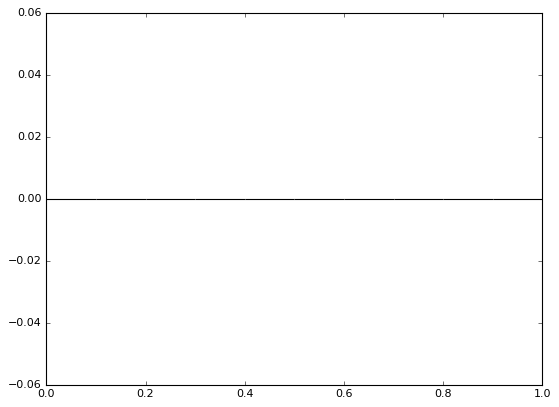

In [5]:
otherTimesteps = np.unique(np.array(otherTimesteps))
print otherTimesteps
fig = plt.figure(figsize=(8,6))
plt.hist(otherTimesteps)
plt.show()

(29926, 99)
[1037.177906   2246.73146367 1160.1654     ...  957.955619    620.178535
 2689.40454647]


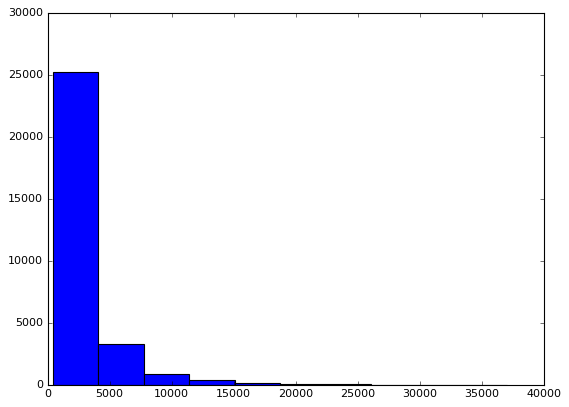

In [6]:
print np.shape(newData)
print newData[:,2]
#print newData[1:]
fig = plt.figure(figsize=(8,6))
plt.hist(newData[:,2])
plt.show()

In [7]:
np.savetxt("./CDJ36_5Gyr_reformatted.txt",newData,fmt="%9f",header=header)